<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
            
    - **Reference**
    
    [https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [4]:
## Import Libraries

import itertools
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# conda install -c conda-forge mlxtend
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [5]:
# breast-cancer-wisconsin-data-old.csv
breast_cancer_csv = 'C:/Users/user/Documents/IOD_data_MAIN/DATA/breast-cancer-wisconsin-data-old.csv'
df = pd.read_csv(breast_cancer_csv)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [8]:
df.columns =['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'] 

In [9]:
df.head()
# Class: (2 for benign, 4 for malignant)

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [10]:
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
#Convert object to float 
df['Bare_Nuclei'] = df['Bare_Nuclei'].apply(lambda col: pd.to_numeric(col, errors = 'coerce'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           698 non-null    int64  
 1   Clump_Thickness              698 non-null    int64  
 2   Uniformity_of_Cell_Size      698 non-null    int64  
 3   Uniformity_of_Cell_Shape     698 non-null    int64  
 4   Marginal_Adhesion            698 non-null    int64  
 5   Single_Epithelial_Cell_Size  698 non-null    int64  
 6   Bare_Nuclei                  682 non-null    float64
 7   Bland_Chromatin              698 non-null    int64  
 8   Normal_Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [13]:
df.isnull().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
df.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,682.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.645226,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mean())

In [16]:
df.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           698 non-null    int64  
 1   Clump_Thickness              698 non-null    int64  
 2   Uniformity_of_Cell_Size      698 non-null    int64  
 3   Uniformity_of_Cell_Shape     698 non-null    int64  
 4   Marginal_Adhesion            698 non-null    int64  
 5   Single_Epithelial_Cell_Size  698 non-null    int64  
 6   Bare_Nuclei                  698 non-null    float64
 7   Bland_Chromatin              698 non-null    int64  
 8   Normal_Nucleoli              698 non-null    int64  
 9   Mitoses                      698 non-null    int64  
 10  Class                        698 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [18]:
# df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [19]:
df['Bare_Nuclei'].unique()

array([10.       ,  2.       ,  4.       ,  1.       ,  3.       ,
        9.       ,  7.       ,  3.5483871,  5.       ,  8.       ,
        6.       ])

<AxesSubplot:>

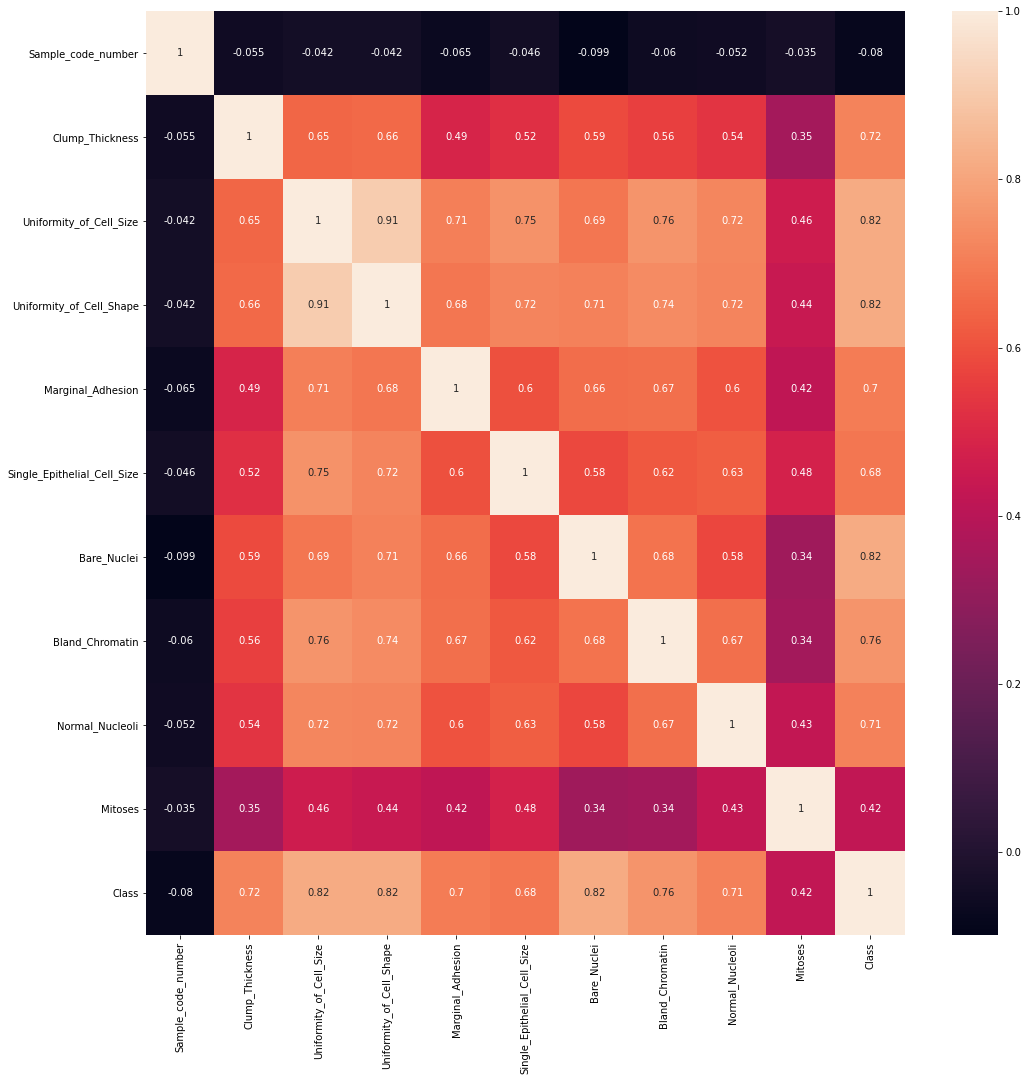

In [20]:
df.corr()
plt.figure(figsize = (17,17))
sns.heatmap(df.corr(),annot=True)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [21]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0 )

In [22]:
feat = df.columns[1:10]
X = df[feat]
y = df['Class']

In [23]:
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,4,4,5,7,10.0,3,2,1
1,3,1,1,1,2,2.0,3,1,1
2,6,8,8,1,3,4.0,3,7,1
3,4,1,1,3,2,1.0,3,1,1
4,8,10,10,8,7,10.0,9,7,1


In [24]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled[:3]

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [26]:

dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
svm = SVC()    

bagging1 = BaggingClassifier(
    base_estimator = dtree,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)
bagging2 = BaggingClassifier(
    base_estimator = svm,
    n_estimators = 10,
    max_samples = 0.8,
    max_features = 0.8)

In [27]:
bagging1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=2),
                  max_features=0.8, max_samples=0.8)

In [28]:
bagging1.score(X_test,y_test)

0.9523809523809523

In [29]:
bagging2.fit(X_train,y_train)
bagging2.score(X_test,y_test)

0.9761904761904762

In [30]:
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.9333333333333333

In [31]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9761904761904762

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [32]:
X_columns = df[['Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape']]
X_1 = np.array(X_columns)
y_1 = np.array(y)

In [33]:
# X.shape

Accuracy: 0.91 (+/- 0.04) [Decision Tree]
Accuracy: 0.94 (+/- 0.02) [SVM]
Accuracy: 0.94 (+/- 0.03) [Bagging Tree]
Accuracy: 0.92 (+/- 0.04) [Bagging SVM]


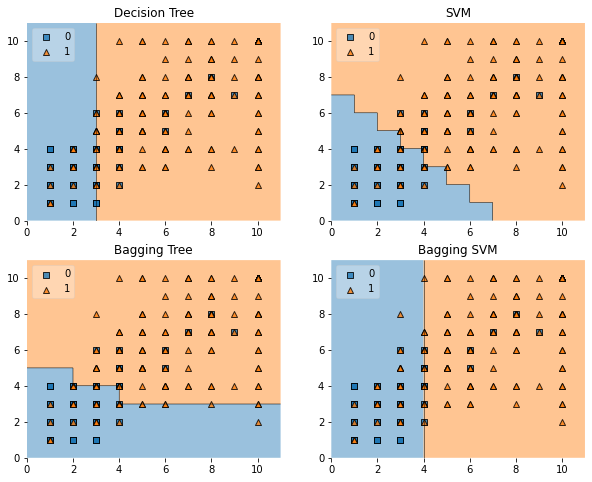

In [34]:
label = ['Decision Tree', 'SVM', 'Bagging Tree', 'Bagging SVM']
clf_list = [dtree, svm, bagging1, bagging2]

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_1, y_1, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
        
    clf.fit(X_1, y_1)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_1, y = y_1, clf = clf, legend = 2)
    plt.title(label)

plt.show()

Things to be done, The above error :X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

I need to change X to np.array and limit to 2 columns. Need to find the highest correlation points. 
Can try using svm, random forest and other model to play around the accuracy 

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

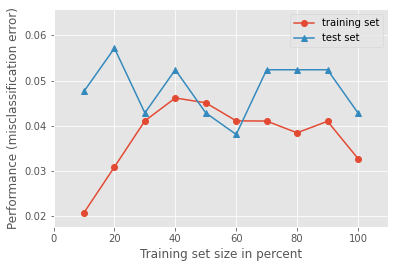

In [35]:
# plot learning curves

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model = False, style = 'ggplot')
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [36]:
# Ensemble Size
num_est = np.linspace(1, 100, 20, dtype = np.int8)


bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(
        base_estimator = dtree,
        n_estimators = n_est,
        max_samples = 0.8,
        max_features = 0.8)
    scores = cross_val_score(bg_clf, X, y, cv = 3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

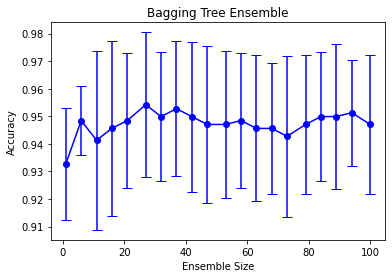

In [37]:
plt.figure()
(_, caps, _) = plt.errorbar(
    num_est,
    bg_clf_cv_mean,
    yerr = bg_clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                

plt.title('Bagging Tree Ensemble')
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.show()

© 2020 Institute of Data